Considering the gaussian function in one dimension

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as mpl

## Part 1
Plot the Finite-Difference Derivative of

$$ G_T = -(G_1+G_2) $$

where $ G_1=y(x,\sigma=1,\mu=-1) $ und $ G_2=y(x,\sigma=0.5,\mu=2) $ two gaussian functions to model two potential wells in the range $-5 \leqslant x \leqslant 5$.

In [2]:
# Gaussian Functions
def gaussian1(x,sigma,mu):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))

In [3]:
# Finite-Difference Derivative
def FDD(x,y):
    Dy = np.zeros(x.size)
    for i in np.arange(x.size-1):
        Dy[i] = (y[i+1]-y[i]) / (x[i+1]-x[i])
    return Dy

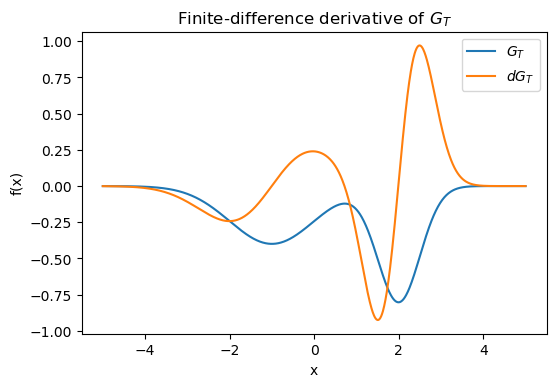

In [11]:
# Define a linear space for x from -5 to 5
N = 1000
xr = np.linspace(-5,5,N)

G1 = gaussian1(xr,1,-1)
G2 = gaussian1(xr,0.5,2)
GT = -(G1+G2)

# Evaluate the FDD(Finite-Difference Derivative) of GT
Dy = FDD(xr,GT)

Graph1 = mpl.figure(dpi=100)
mpl.plot(xr,GT,label="$G_T$")
mpl.plot(xr,Dy,label="$dG_T$")
mpl.xlabel("x")
mpl.ylabel("f(x)")
mpl.legend()
mpl.title("Finite-difference derivative of $G_T$")
mpl.show()

## Part 2
Plot the FDD of $G_F$, where $G_F$ is equals to $G_T$, unless $G_T\geqslant-0.2$, in which case $G_F=-0.2$ using both vectorization and for-loop to evaluate and compare the elapsed times.

Time elapsed 0.0 s


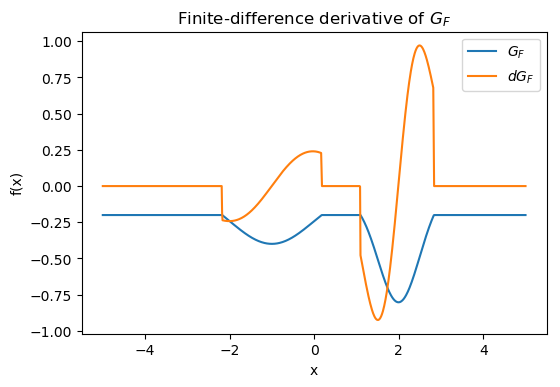

In [16]:
from time import time
t1 = time()

# Defining GF using True/False mask
GF = GT*(GT<-0.2) + (-0.2)*np.invert(GT<-0.2)

elapsed1 = time()-t1
print('Time elapsed',elapsed1,'s')

# Evaluate the FDD (Finite-Difference Derivative) of GF using vectorization
FDD2 = (GF[1:]-GF[:-1]) / (xr[1:]-xr[:-1])
FDD2 = np.hstack([FDD2,0])

Graph2 = mpl.figure(dpi=100)
mpl.plot(xr,GF,label="$G_F$")
mpl.plot(xr,FDD2,label="$dG_F$")
mpl.xlabel("x")
mpl.ylabel("f(x)")
mpl.legend()
mpl.title("Finite-difference derivative of $G_F$")
mpl.show()

In [15]:
t2 = time()

# Defining GF using elementweise comperation (flow-control)
GF2 = np.zeros_like(GT)
for i in np.arange(GT.size):
    if GT[i]<-0.2:
        GF2[i] = GT[i]
    else:
        GF2[i] = -0.2

elapsed2 = time()-t2
print('Time elapsed',elapsed2,'s')

Time elapsed 0.0 s
